In [713]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time
import imutils
from copy import deepcopy

%matplotlib inline

In [2]:
img_file = '../img/raw/range/IMG_3537.JPG'
img = cv2.imread(img_file, 1)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread(img_file, 0)
gray_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

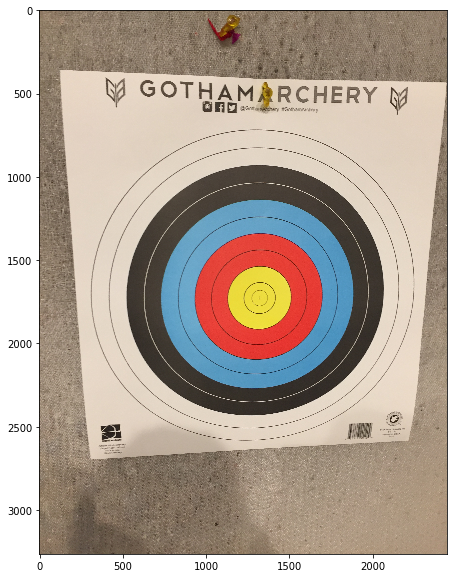

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(rgb_img);

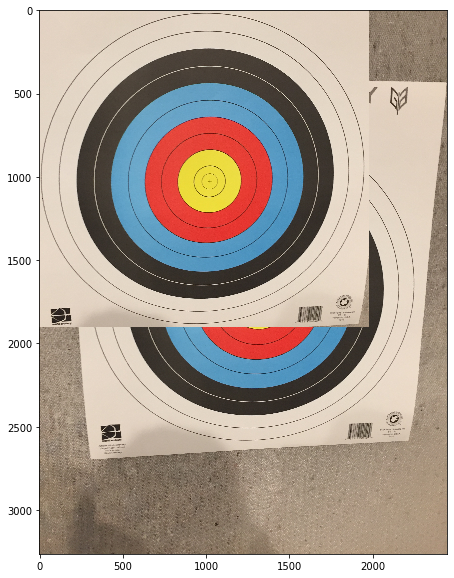

In [4]:
plt.figure(figsize=(10,10))
target = rgb_img[700:2600, 300:2280]
rgb_img[:1900, :1980] = target
plt.imshow(rgb_img);

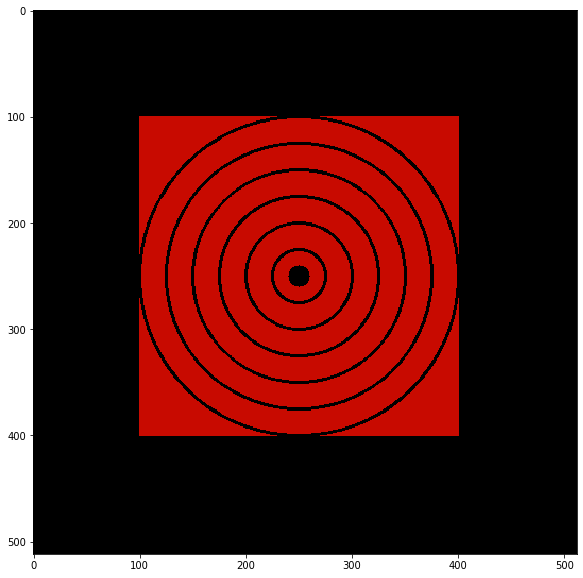

In [5]:
img = np.zeros((512,512,3), np.uint8)
img = cv2.rectangle(img,(100,100),(400,400),(200,10,0),-1)
img = cv2.circle(img,(250,250), 150, (0,0,0), 2)
img = cv2.circle(img,(250,250), 125, (0,0,0), 2)
img = cv2.circle(img,(250,250), 100, (0,0,0), 2)
img = cv2.circle(img,(250,250), 75, (0,0,0), 2)
img = cv2.circle(img,(250,250), 50, (0,0,0), 2)
img = cv2.circle(img,(250,250), 25, (0,0,0), 2)
img = cv2.circle(img,(250,250), 10, (0,0,0), -1)
plt.figure(figsize=(10,10))
plt.imshow(img);

In [6]:
img_file = '../img/raw/range/IMG_3546.JPG'
img = cv2.resize(cv2.imread(img_file, 1), (306, 408))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_file = '../img/raw/range/IMG_3555.JPG'
img = cv2.resize(cv2.imread(img_file, 1), (306, 408))
rgb_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

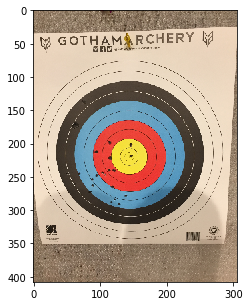

In [7]:
from IPython import display

steps = 20
for x in range(steps):
    wgt = abs(1 - 2 * x / float(steps - 1))
    blend = cv2.addWeighted(rgb_img, wgt, rgb_img2, 1 - wgt, 0)
    plt.figure(figsize=(5, 5))
    plt.imshow(blend)
    #time.sleep(.05)
    display.clear_output(wait=True)
    plt.show()

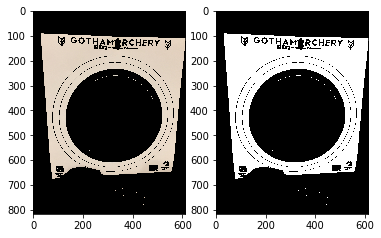

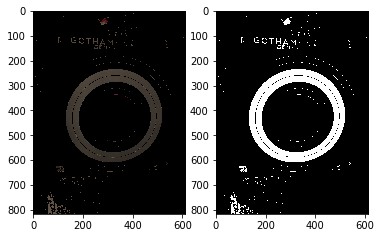

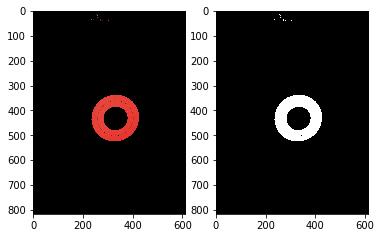

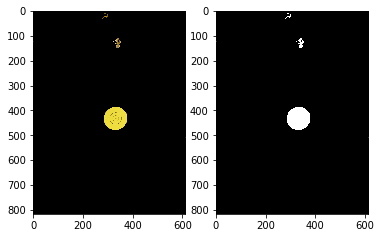

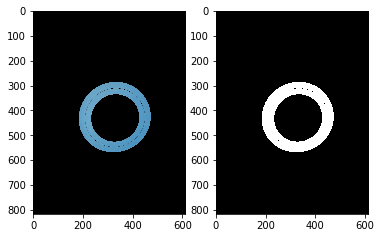

In [8]:
img_file = '../img/raw/range/IMG_3537.JPG'
img = cv2.resize(cv2.imread(img_file, 1), (612, 816))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

colors = {
    'white': {'low': np.array([0, 0, 205]), 'high': np.array([180, 50, 255])},
    'black': {'low': np.array([0, 0, 0]), 'high': np.array([180, 255, 100])},
    'red': {'low': np.array([0, 50, 100]), 'high': np.array([10, 255, 255])},
    'yellow': {'low': np.array([20, 50, 100]), 'high': np.array([80, 255, 255])},
    'blue': {'low': np.array([80, 50, 100]), 'high': np.array([115, 255, 255])},
}

for key in colors.keys():
    mask = cv2.inRange(hsv, colors[key]['low'], colors[key]['high'])
    out = cv2.bitwise_and(rgb, rgb, mask=mask)
    plt.subplot(1, 2, 1)
    plt.imshow(out)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
    plt.show();

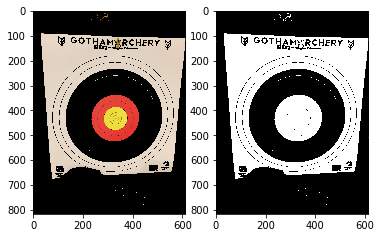

In [9]:
mask = 0
cols = [
    'red',
    'yellow',
    #'blue',
    #'black',
    'white'
]
for key in cols:
    mask = cv2.inRange(hsv, colors[key]['low'], colors[key]['high']) + mask
mask = np.clip(mask, 0, 255)
out = cv2.bitwise_and(rgb, rgb, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(out)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
plt.show();

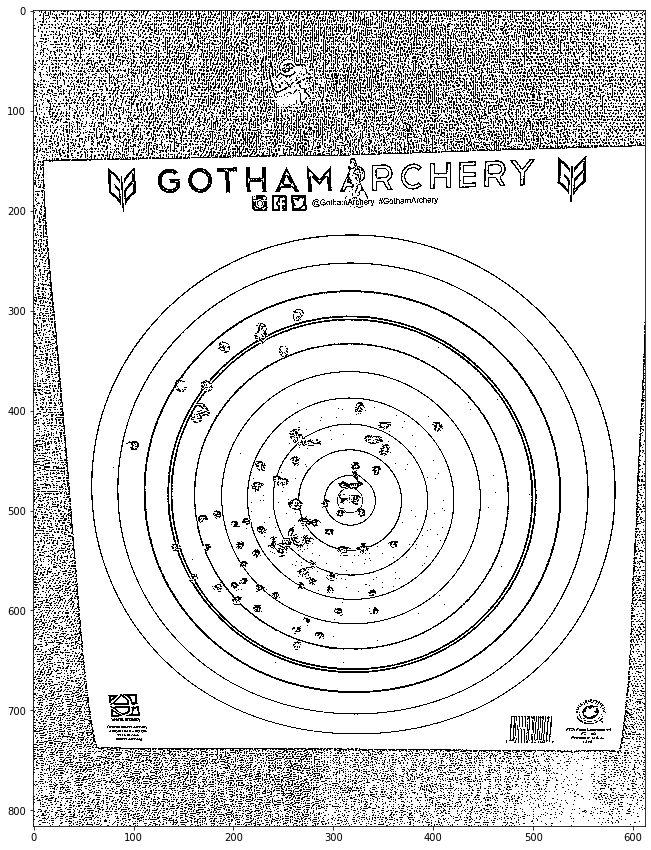

In [10]:
#img_file = '../img/raw/range/IMG_3540.JPG'
img_file = '../img/raw/range/IMG_3560.JPG'
#img_file = '../img/raw/home/IMG_3530.JPG'
img = cv2.imread(img_file, 1)
img = cv2.resize(img, (612, 816))

bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = cv2.adaptiveThreshold(bw, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                           cv2.THRESH_BINARY, 5, 6)
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(bw, cv2.COLOR_GRAY2RGB));

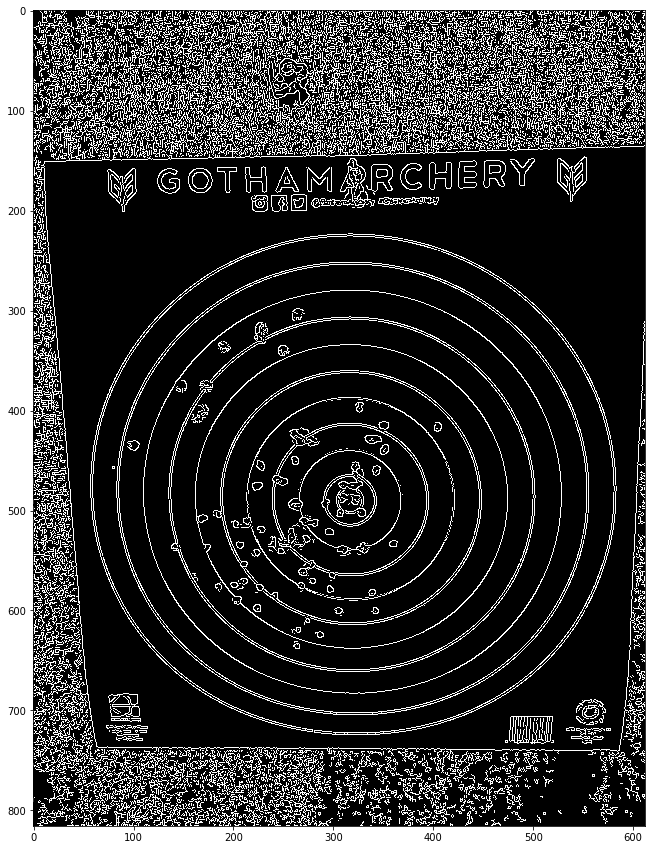

In [11]:
#img_file = '../img/raw/range/IMG_3540.JPG'
img_file = '../img/raw/range/IMG_3560.JPG'
#img_file = '../img/raw/home/IMG_3530.JPG'
img = cv2.imread(img_file, 1)
img = cv2.resize(img, (612, 816))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#edges = cv2.Canny(img, 30, 100)
edges = cv2.Canny(img, 50, 120)
plt.figure(figsize=(15, 15))
plt.imshow(edges, cmap='gray');

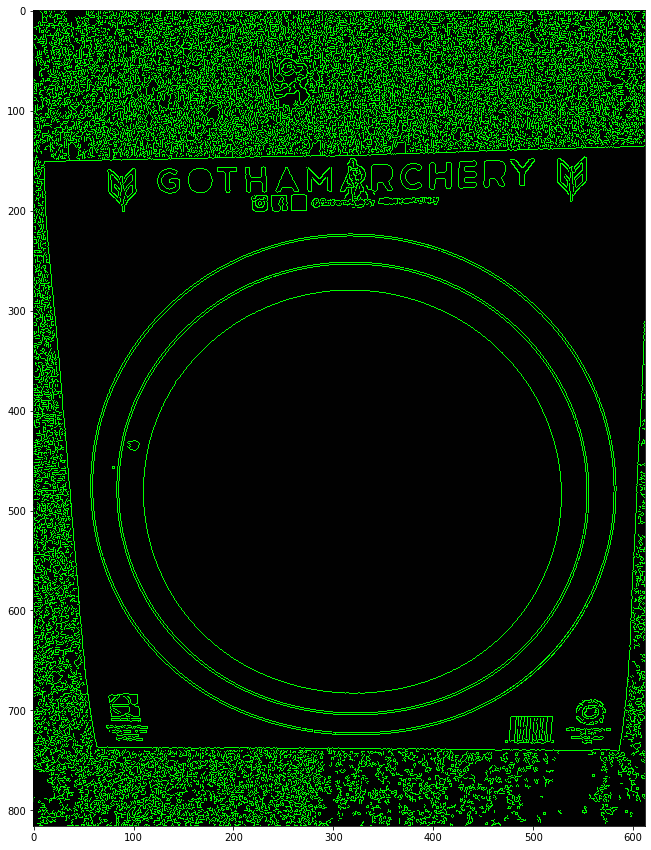

In [12]:
cnt_img = deepcopy(edges)
bg = deepcopy(img) 
bg = bg * 0 + 1
#image, contours, hierarchy = cv2.findContours(cnt_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#image, contours, hierarchy = cv2.findContours(cnt_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image, contours, hierarchy = cv2.findContours(cnt_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt_img = cv2.drawContours(bg, contours, -1, (0, 255, 0), 1)
plt.figure(figsize=(15, 15))
plt.imshow(cnt_img);

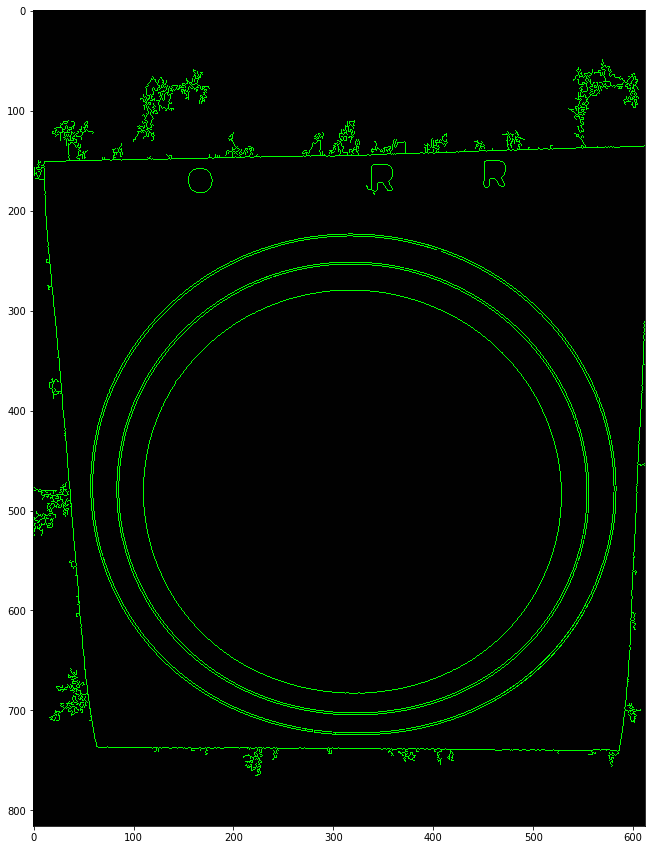

In [13]:
areas = [cv2.contourArea(contour) for contour in contours]
idx = np.argsort(areas)[:-10:-1]
lrg_contours = np.take(contours, idx)

cnt_img = deepcopy(edges)
bg = deepcopy(img) 
bg = bg * 0 + 1
cnt_img = cv2.drawContours(bg, lrg_contours, -1, (0, 255, 0), 1)
plt.figure(figsize=(15, 15))
plt.imshow(cnt_img);

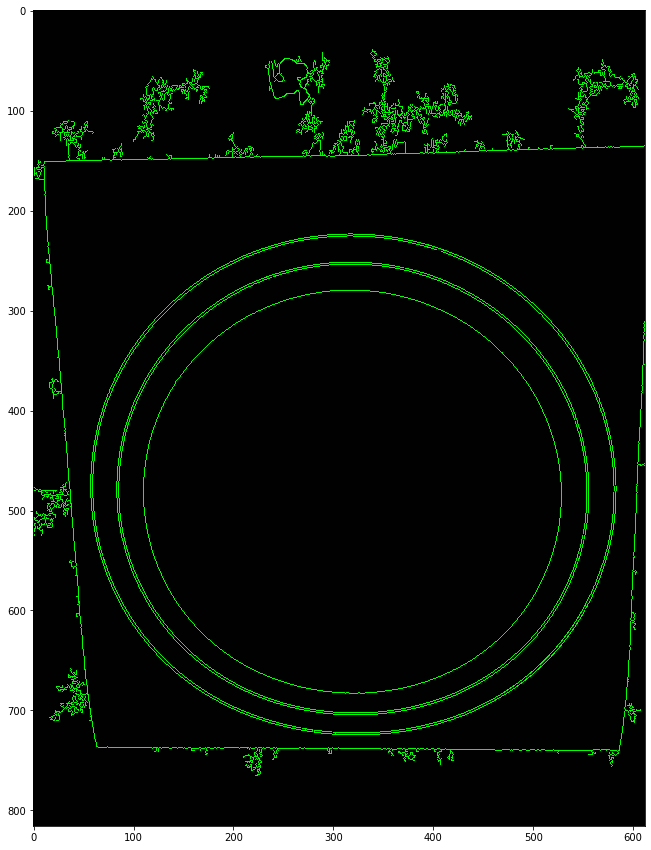

In [14]:
areas = [cv2.arcLength(contour, True) for contour in contours]
idx = np.argsort(areas)[:-10:-1]
lrg_contours = np.take(contours, idx)

cnt_img = deepcopy(edges)
bg = deepcopy(img) 
bg = bg * 0 + 1
cnt_img = cv2.drawContours(bg, lrg_contours, -1, (0, 255, 0), 1)
plt.figure(figsize=(15, 15))
plt.imshow(cnt_img);

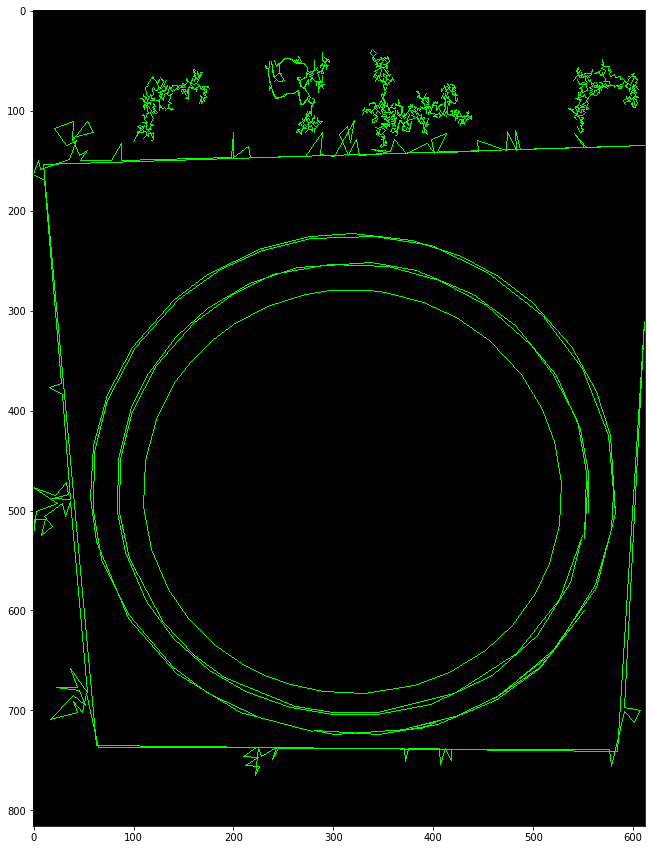

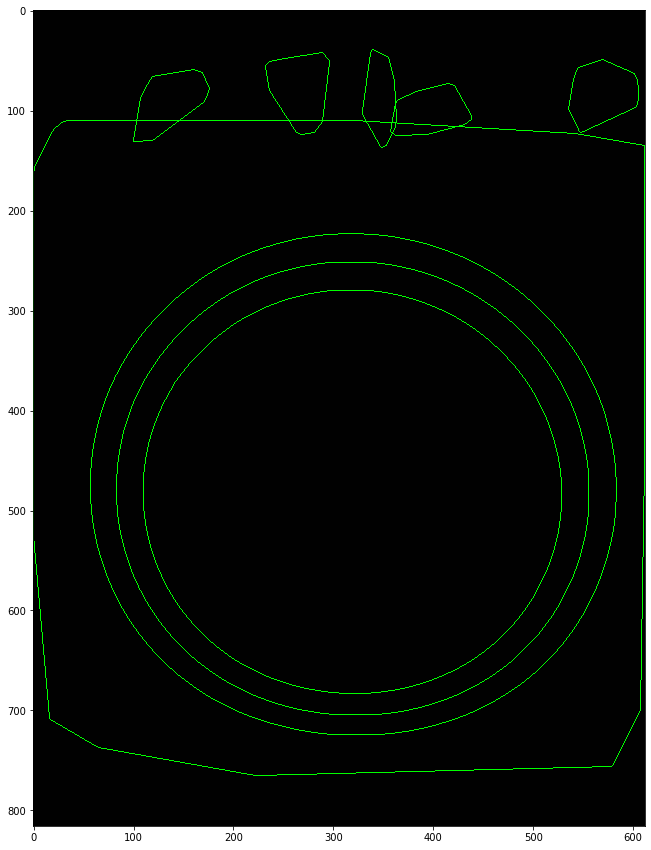

In [15]:
approxes = []
areas = []
hulls = []
for contour in contours:
    epsilon = 0.001 * cv2.arcLength(contour, False)
    approxes.append(cv2.approxPolyDP(contour, epsilon, True))
    areas.append(cv2.arcLength(approxes[-1], True))
    hulls.append(cv2.convexHull(contour))
idx = np.argsort(areas)[:-10:-1]
lrg_contours = np.take(approxes, idx)
lrg_hulls = np.take(hulls, idx)

cnt_img = deepcopy(edges)
#bg = deepcopy(img)
bg = bg * 0 + 1
cnt_img = cv2.drawContours(bg, lrg_contours, -1, (0, 255, 0), 1)
plt.figure(figsize=(15, 15))
plt.imshow(cnt_img)
plt.show()

cnt_img = deepcopy(edges)
#bg = deepcopy(img)
bg = bg * 0 + 1
cnt_img = cv2.drawContours(bg, lrg_hulls, -1, (0, 255, 0), 1)
plt.figure(figsize=(15, 15))
plt.imshow(cnt_img);

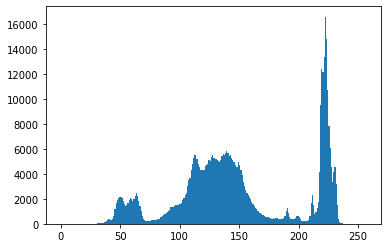

In [16]:
#img_file = '../img/raw/range/IMG_3540.JPG'
#img_file = '../img/raw/range/IMG_3560.JPG'
#img_file = '../img/raw/home/IMG_3530.JPG'
img = cv2.imread(img_file, 1)
img = cv2.resize(img, (612, 816))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
channel = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#channel = img[:,:,2]
plt.hist(channel.ravel(), 256, [0,256]);

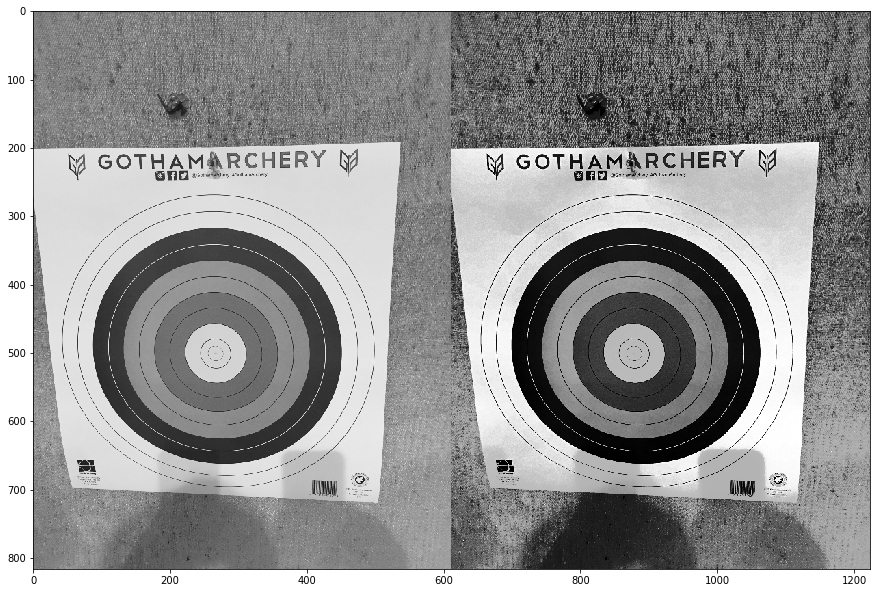

In [17]:
equ = cv2.equalizeHist(channel)
res = np.hstack((channel, equ))
plt.figure(figsize=(15,15))
plt.imshow(res, cmap='gray');

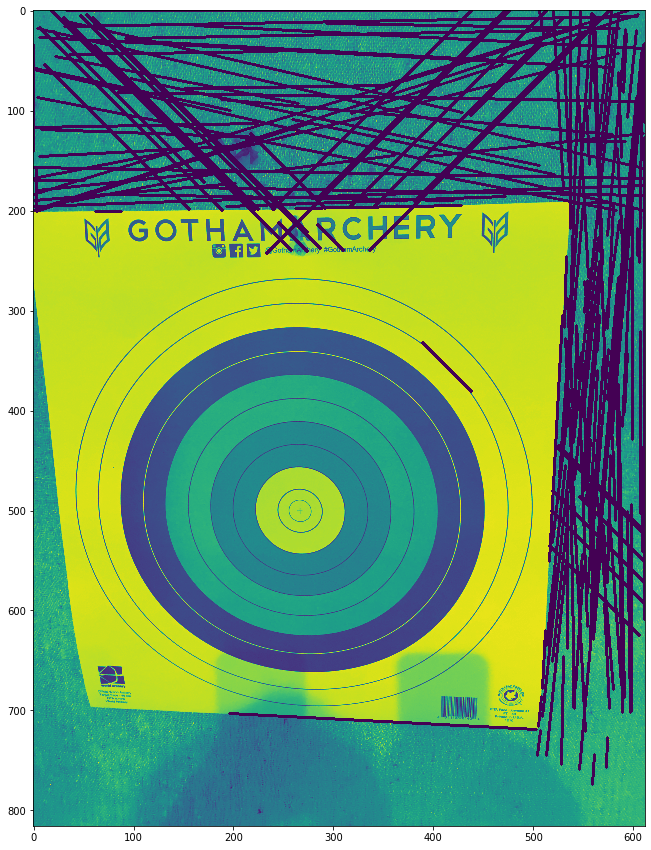

In [87]:
#img_file = '../img/template/template.jpg'
img_file = '../img/raw/range/IMG_3540.JPG'
#img_file = '../img/raw/range/IMG_3560.JPG'
#img_file = '../img/raw/home/IMG_3530.JPG'
img = cv2.imread(img_file, 1)
img = cv2.resize(img, (612, 816))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img, 50, 120)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=25, maxLineGap=10)
for x1, y1, x2, y2 in lines[:, 0]:
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

#circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=120,
#                           param2=50, minRadius=10, maxRadius=0)
#for i in circles[0,:]:
#    cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(img);

In [83]:
lines[:, 0][0]

array([402, 342, 428, 368], dtype=int32)

### Find target borders

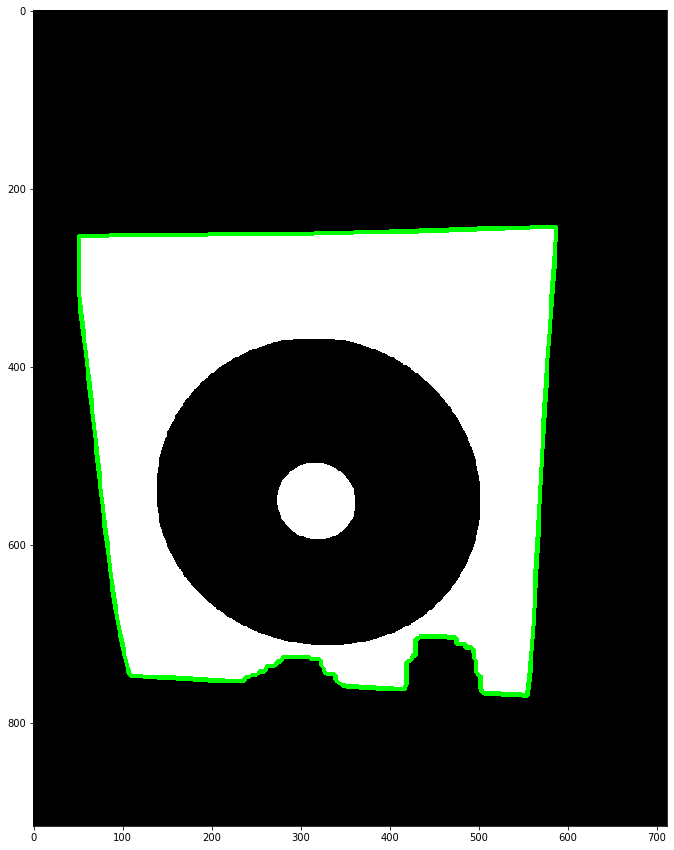

In [360]:
#img_file = '../img/template/template.jpg'
img_file = '../img/raw/range/IMG_3540.JPG'
#img_file = '../img/raw/range/IMG_3560.JPG'
#img_file = '../img/raw/home/IMG_3530.JPG'
img = cv2.imread(img_file, 1)
img = cv2.resize(img, (612, 816))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.equalizeHist(img)

mask = cv2.inRange(img, 180, 255)
mask = cv2.copyMakeBorder(mask, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=0)
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((30, 30), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

'''
coords = np.column_stack(np.where(mask > 0))
rect = cv2.minAreaRect(coords)
box = cv2.boxPoints(rect)
box = np.int0(box)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask = cv2.drawContours(mask, [box], 0, (0, 0, 255), 3)
'''

'''
dst = cv2.cornerHarris(mask, 3, 5, 0.1)
dst = cv2.dilate(dst, None, iterations=3)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
mask[dst > 0.01 * dst.max()] = [0, 0, 255]
'''

image, contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
out = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
out = cv2.drawContours(out, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=(15, 15))
plt.imshow(out, cmap='gray');

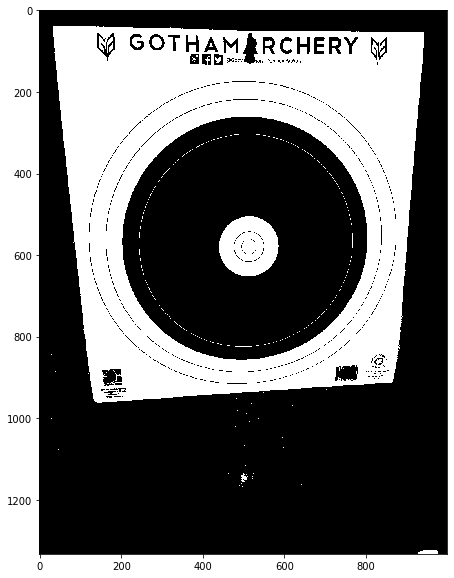

In [684]:
colors = {
    'yellow': [{'low': np.array([15, 130, 130]), 'high': np.array([45, 255, 255])}],
    'red': [{'low': np.array([165, 130, 130]), 'high': np.array([180, 255, 255])},
            {'low': np.array([0, 130, 130]), 'high': np.array([15, 255, 255])}],
    'blue': [{'low': np.array([80, 80, 80]), 'high': np.array([130, 255, 255])}],
}
white = {'low': 160, 'high': 255}

#img_file = '../img/template/template.jpg'
img_file = '../img/raw/range/IMG_3542.JPG'
#img_file = '../img/raw/range/IMG_3560.JPG'
#img_file = '../img/raw/home/IMG_3531.JPG'

img = cv2.imread(img_file, 1)
width = 1000
height = int(width / img.shape[1] * img.shape[0])
img = cv2.resize(img, (width, height))
knl_size = (width + height) // 550
sigma_val = width // 20
d_val = width // 50

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

paper = gray.copy()
paper = cv2.equalizeHist(paper)
paper = cv2.bilateralFilter(paper, d_val, sigma_val, sigma_val)
ret, paper = cv2.threshold(paper, white['low'], white['high'], cv2.THRESH_BINARY)
#paper = cv2.inRange(paper, white['low'], white['high'])

'''
circle_data = []
for key in colors.keys():
    mask = 0
    for rng in colors[key]:
        mask = cv2.bitwise_or(cv2.inRange(hsv, rng['low'], rng['high']), mask)
    kernel = np.ones((knl_size, knl_size), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    _, contours, __ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(contour) for contour in contours]
    idx = np.argsort(areas)[-1]
    radius = np.sqrt(areas[idx] / np.pi)
    
    M = cv2.moments(contours[idx])
    center_x = int(M["m10"] / M["m00"])
    center_y = int(M["m01"] / M["m00"])
    
    circle_data.append({'color': key,
                        'radius': radius,
                        'center_x': center_x,
                        'center_y': center_y})
    
    out = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    out = cv2.drawContours(out, contours[idx], -1, (255, 0, 0), 20)
    out = cv2.circle(out, (center_x, center_y), 30, (0, 0, 255), -1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(out)
    plt.show();
        

    
_, contours, __ = cv2.findContours(paper, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [cv2.approxPolyDP(contour, 5, True) for contour in contours]
segments = []
for c in contours:
    if len(c) <= 1:
        continue
    pnt_a = c[:-1][:, 0]
    pnt_b = c[1:][:, 0]
    dists = np.apply_along_axis(np.linalg.norm, 1, pnt_a - pnt_b)
    segments.extend(list(zip(pnt_a.tolist(), pnt_b.tolist(), dists)))
segments = sorted(segments, key=lambda x: x[2], reverse=True)
segments = np.array([[s[0], s[1]] for s in segments])
paper = cv2.cvtColor(paper, cv2.COLOR_GRAY2RGB)
paper = cv2.drawContours(paper, segments, -1, (255, 0, 0), 20)

trg_center_x = trg_center_y = 0
for d in circle_data:
    trg_center_x += d['center_x']
    trg_center_y += d['center_y']
trg_center_x = trg_center_x // len(circle_data)
trg_center_y = trg_center_y // len(circle_data)

radius = max([d['radius'] for d in circle_data])
x_min = max(int(trg_center_x - 2 * radius), 0)
x_max = min(int(trg_center_x + 2 * radius), width)
y_min = max(int(trg_center_y - 2 * radius), 0)
y_max = min(int(trg_center_y + 2 * radius), height)
img = img[y_min:y_max, x_min:x_max]

rect = cv2.minAreaRect(contours[idx])
box = cv2.boxPoints(rect)
box = np.int0(box)

plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.show();
'''
plt.figure(figsize=(10, 10))
plt.imshow(paper, cmap='gray')
plt.show();

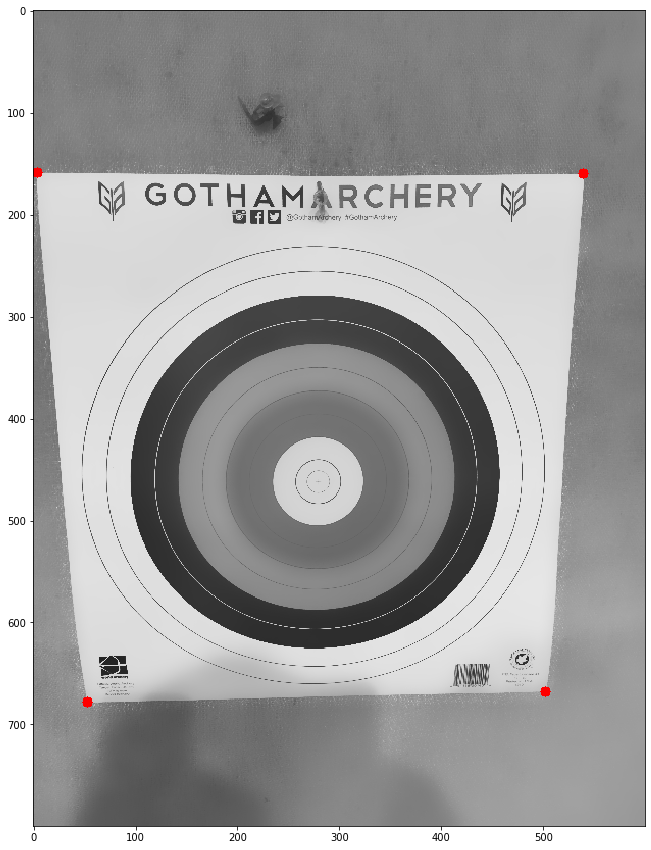

In [807]:
#img_file = '../img/template/template.jpg'
img_file = '../img/raw/range/IMG_3539.JPG'
#img_file = '../img/raw/range/IMG_3542.JPG'
#img_file = '../img/raw/range/IMG_3558.JPG'
#img_file = '../img/raw/home/IMG_3531.JPG'

width = 600
canny_t1 = 100
canny_t2 = 400
perim_pct = .015

img = cv2.imread(img_file, 1)
orig = img.copy()
height = int(width / img.shape[1] * img.shape[0])
img = cv2.resize(img, (width, height))
knl_size = (width + height) // 550
sigma_val = width // 15
d_val = width // 20

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = cv2.bilateralFilter(gray, d_val, sigma_val, sigma_val)
edges = cv2.Canny(gray, canny_t1, canny_t2)

_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
paper = None
max_perim = 0
for c in contours:
    perim = cv2.arcLength(c, True)
    if perim > max_perim:
        approx = cv2.approxPolyDP(c, perim * perim_pct, True)
        if len(approx) == 4:
            paper = approx
            max_perim = perim
            
#contours = [cv2.approxPolyDP(contour, 2, True) for contour in contours]
#contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
if type(paper) != type(None):
    gray = cv2.drawContours(gray, paper, -1, (255, 0, 0), 10)

plt.figure(figsize=(15, 15))
plt.imshow(gray, cmap='gray')
#plt.imshow(img)
plt.show();

In [800]:
approx

array([[[550, 141]],

       [[ 35, 154]],

       [[ 78, 662]],

       [[527, 660]]], dtype=int32)